In [2]:
'''

application of calculate ocean heat budget


good ref. slides
https://www.ecco-group.org/docs/ss_ThompsonECCO.pdf

'''

'\n\napplication of calculate ocean heat budget\n\n\ngood ref. slides\nhttps://www.ecco-group.org/docs/ss_ThompsonECCO.pdf\n\n'

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from osgeo import gdal
import xarray as xr
from scipy.io import loadmat
from scipy.interpolate import interp2d, NearestNDInterpolator

In [4]:
import os
os.getcwd()

%cd /g/data/p66/ars599/EAE_Lecture

/g/data/p66/ars599/EAE_Lecture


In [5]:
idir = '/g/data/p66/ars599/work_eae/'
filenames = [idir+'ts_Amon_ACCESS-CM2_historical_r5i1p1f1_gn_200001-200912.nc',
            idir+'tas_Amon_ACCESS-CM2_historical_r5i1p1f1_gn_200001-200912.nc',
            idir+'uas_Amon_ACCESS-CM2_historical_r5i1p1f1_gn_200001-200912.nc',
            idir+'vas_Amon_ACCESS-CM2_historical_r5i1p1f1_gn_200001-200912.nc', 
            idir+'hfls_Amon_ACCESS-CM2_historical_r5i1p1f1_gn_200001-200912.nc',
            idir+'hfss_Amon_ACCESS-CM2_historical_r5i1p1f1_gn_200001-200912.nc',
            idir+'huss_Amon_ACCESS-CM2_historical_r5i1p1f1_gn_200001-200912.nc',
            idir+'rlds_Amon_ACCESS-CM2_historical_r5i1p1f1_gn_200001-200912.nc',
            idir+'rlus_Amon_ACCESS-CM2_historical_r5i1p1f1_gn_200001-200912.nc',
            idir+'rsds_Amon_ACCESS-CM2_historical_r5i1p1f1_gn_200001-200912.nc',
            idir+'rsus_Amon_ACCESS-CM2_historical_r5i1p1f1_gn_200001-200912.nc',
            idir+'psl_Amon_ACCESS-CM2_historical_r5i1p1f1_gn_200001-200912.nc']

file_list = []

for filename in filenames:
    ds = xr.open_dataset(filename)
    file_list.append(ds)

#file_list

In [6]:
'''

filenames = [idir+'ts_Amon_ACCESS-CM2_historical_r5i1p1f1_gn_200001-200912.nc',   0
            idir+'tas_Amon_ACCESS-CM2_historical_r5i1p1f1_gn_200001-200912.nc',   1
            idir+'uas_Amon_ACCESS-CM2_historical_r5i1p1f1_gn_200001-200912.nc',   2
            idir+'vas_Amon_ACCESS-CM2_historical_r5i1p1f1_gn_200001-200912.nc',   3
            idir+'hfls_Amon_ACCESS-CM2_historical_r5i1p1f1_gn_200001-200912.nc',  4
            idir+'hfss_Amon_ACCESS-CM2_historical_r5i1p1f1_gn_200001-200912.nc',  5
            idir+'huss_Amon_ACCESS-CM2_historical_r5i1p1f1_gn_200001-200912.nc',  6
            idir+'rlds_Amon_ACCESS-CM2_historical_r5i1p1f1_gn_200001-200912.nc',  7
            idir+'rlus_Amon_ACCESS-CM2_historical_r5i1p1f1_gn_200001-200912.nc',  8
            idir+'rsds_Amon_ACCESS-CM2_historical_r5i1p1f1_gn_200001-200912.nc',  9
            idir+'rsus_Amon_ACCESS-CM2_historical_r5i1p1f1_gn_200001-200912.nc', 10
            idir+'psl_Amon_ACCESS-CM2_historical_r5i1p1f1_gn_200001-200912.nc'] 11

'''

# Convert the lists to NumPy arrays
file_list[0]

<xarray.Dataset>
Dimensions:    (time: 120, bnds: 2, lon: 192, lat: 144)
Coordinates:
  * time       (time) datetime64[ns] 2000-01-16T12:00:00 ... 2009-12-16T12:00:00
  * lon        (lon) float64 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
  * lat        (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    lon_bnds   (lon, bnds) float64 ...
    lat_bnds   (lat, bnds) float64 ...
    ts         (time, lat, lon) float32 ...
Attributes: (12/49)
    CDI:                    Climate Data Interface version 2.0.5 (https://mpi...
    source:                 ACCESS-CM2 (2019): \naerosol: UKCA-GLOMAP-mode\na...
    institution:            CSIRO (Commonwealth Scientific and Industrial Res...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    ...                     ...
    variant_label:          r5i1p1f1
    version:                v20210607
    license:                CMIP6 model data produced by CSIRO is licensed un...
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/ba468779-38bc-473e-8beb-007cf2e52543
    CDO:                    Climate Data Operators version 2.0.5 (https://mpi...

# a) SW

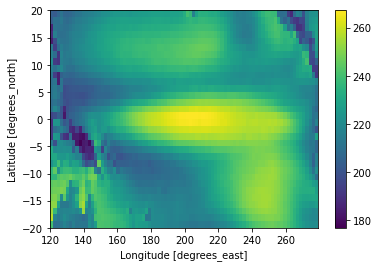

In [7]:
lon1, lon2 = [120,280]
lat1, lat2 = [-20,20]

rsds = file_list[9]['rsds'].sel(lat=slice(lat1, lat2), lon=slice(lon1, lon2))
rsus = file_list[10]['rsus'].sel(lat=slice(lat1, lat2), lon=slice(lon1, lon2))

#rsds.mean('time').plot()
SW = rsds - rsus
SW.mean('time').plot()


## compare to ocean

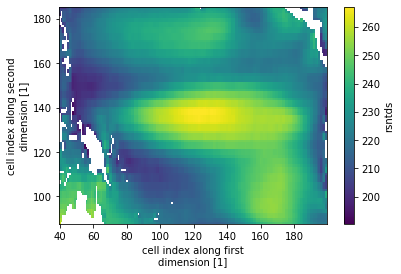

In [8]:
filename = idir+'rsntds_Omon_ACCESS-CM2_historical_r5i1p1f1_gn_200001-200912_v10.nc'
ds = xr.open_dataset(filename)
rsntds = ds['rsntds']
net_sw = rsntds
net_sw.mean('time').plot()

# b) LW

Text(0, 0.5, 'Y Label')

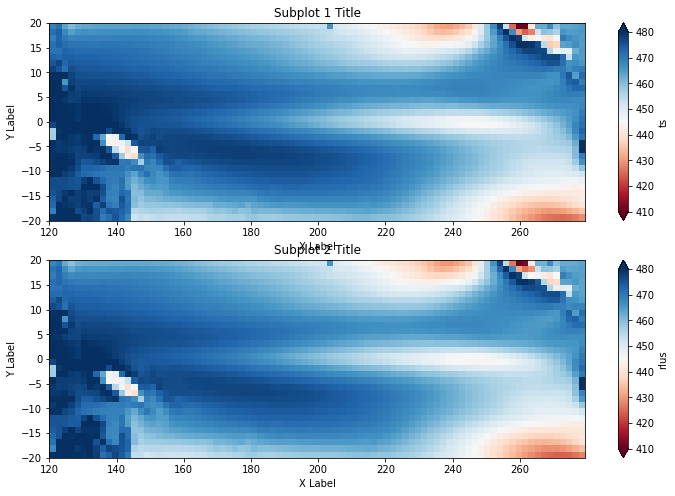

In [9]:
'''
https://iopscience.iop.org/article/10.1088/1748-9326/ac153c

E: is the radiation intensity in W/m2
epsilon: an adimensional coefficient that represents the emissivity of the body. 
         This depends on the material, a perfect black body has an epsilon of 1,
         while other materials have a lower emissivity
sigmma: is the Steffan-Boltzman constant 5.67x10^-8 W/M2/K4
T is the body temperature in K

'''

ts = file_list[0]['ts'].sel(lat=slice(lat1, lat2), lon=slice(lon1, lon2))
tas = file_list[1]['tas'].sel(lat=slice(lat1, lat2), lon=slice(lon1, lon2))
rlds = file_list[7]['rlds'].sel(lat=slice(lat1, lat2), lon=slice(lon1, lon2))
rlus = file_list[8]['rlus'].sel(lat=slice(lat1, lat2), lon=slice(lon1, lon2))

x_ts = ts.lon
y_ts = ts.lat

x_tas = tas.lon
y_tas = tas.lat

net_lw = rlus.mean('time')

epsilon = 1
sigmma = 5.67*10**-8
LW = epsilon * sigmma * ts**4

fig = plt.figure(figsize=(12, 8))

plt.subplot(211)
LW.mean('time').plot(cmap='RdBu',vmin=410,vmax=480)
plt.title('Subplot 1 Title')
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.subplot(212)
net_lw.plot(cmap='RdBu',vmin=410,vmax=480)
plt.title('Subplot 2 Title')
plt.xlabel('X Label')
plt.ylabel('Y Label')


# c) HFSS

In [10]:
uas = file_list[2]['uas'].sel(lat=slice(lat1, lat2), lon=slice(lon1, lon2))
vas = file_list[3]['vas'].sel(lat=slice(lat1, lat2), lon=slice(lon1, lon2))
hfss = file_list[5]['hfss'].sel(lat=slice(lat1, lat2), lon=slice(lon1, lon2))
hfls = file_list[4]['hfls'].sel(lat=slice(lat1, lat2), lon=slice(lon1, lon2))

x_vas = vas.lon
y_vas = vas.lat

x_uas = uas.lon
y_uas = uas.lat

x_hfss = hfss.lon
y_hfss = hfss.lat

print(np.shape(vas))
print(np.shape(uas))
print(np.shape(x_vas))
print(np.shape(y_vas))
print(np.shape(hfss))

uas_regrid = uas.interp(lat=vas.lat, lon=vas.lon)

# Now uas_regrid is interpolated to the grid of vas
print(np.shape(uas_regrid))

(120, 33, 85)
(120, 32, 86)
(85,)
(33,)
(120, 32, 85)
(120, 33, 85)


In [11]:
'''
regrid function

"rnewM12, cnewM12 = interpolate_data(lat, lev, regM12, corM12, lat_new, lev_new)\n",

might be totally useless cuz it's numpy or values output not a xarray !!! very hard to use !!


'''
def interpolate_2d_data(lat, lon, inVar, lat_new, lon_new):
    # Interpolate reg
    func = interp2d(lat, lon, inVar, kind='cubic')
    rnew = func(lat_new, lon_new)
    return rnew

import numpy as np
from scipy.interpolate import RectBivariateSpline

def interpolate_3d_data(lat, lon, inVar, lat_new, lon_new):
    # Get dimensions
    time_steps, lat_shape, lon_shape = inVar.shape
    
    # Create an empty array to store the interpolated data
    interpolated_data = np.empty((time_steps, len(lat_new), len(lon_new)))
    
    # Loop through each time step
    for t in range(time_steps):
        # Extract the 2D slice for the current time step
        inVar_slice = inVar[t, :, :]
        
        # Create the spline for interpolation
        interp_func = RectBivariateSpline(lat, lon, inVar_slice)
        
        # Interpolate the data for the current time step
        rnew = interp_func(lat_new, lon_new)
        
        # Store the interpolated data for the current time step
        interpolated_data[t, :, :] = rnew
    
    return interpolated_data

def interpolate_3d_data(lat, lon, inVar, lat_new, lon_new):
    # Get dimensions
    time_steps, lat_shape, lon_shape = inVar.shape
    
    # Create an empty array to store the interpolated data
    interpolated_data = np.empty((time_steps, len(lat_new), len(lon_new)))
    
    # Loop through each time step
    for t in range(time_steps):
        # Extract the 2D slice for the current time step
        inVar_slice = inVar[t, :, :]
        
        # Create the spline for interpolation
        interp_func = RectBivariateSpline(lat, lon, inVar_slice)
        
        # Interpolate the data for the current time step
        rnew = interp_func(lat_new, lon_new)
        
        # Store the interpolated data for the current time step
        interpolated_data[t, :, :] = rnew
    
    return interpolated_data

def interpolate_3d_data_kp_org(lat, lon, inVar, lat_new, lon_new):
    # Get dimensions
    time_steps, lat_shape, lon_shape = inVar.shape
    
    # Create a new xarray Dataset to store the interpolated data
    interpolated_data = xr.Dataset(coords={'time': np.arange(time_steps), 'lat': lat_new, 'lon': lon_new})
    
    # Loop through each time step
    for t in range(time_steps):
        # Extract the 2D slice for the current time step
        inVar_slice = inVar[t, :, :]
        
        # Create the spline for interpolation
        interp_func = RectBivariateSpline(lat, lon, inVar_slice)
        
        # Interpolate the data for the current time step
        rnew = interp_func(lat_new, lon_new)
        
        # Store the interpolated data for the current time step
        interpolated_data[f'time_{t}'] = (('lat', 'lon'), rnew)
    
    return interpolated_data


def interpolate_3d_data_kp(lat, lon, inVar, lat_new, lon_new):
    # Get dimensions
    time_steps, lat_shape, lon_shape = inVar.shape
    
    # Create a new xarray Dataset to store the interpolated data
    interpolated_data = xr.Dataset(coords={'time': np.arange(time_steps), 'lat': lat_new, 'lon': lon_new})
    
    # Loop through each time step
    for t in range(time_steps):
        # Extract the 2D slice for the current time step
        inVar_slice = inVar[t, :, :]
        
        # Create the spline for interpolation
        interp_func = RectBivariateSpline(lat, lon, inVar_slice)
        
        # Interpolate the data for the current time step
        rnew = interp_func(lat_new, lon_new)
        
        # Store the interpolated data for the current time step
        interpolated_data[f'time_{t}'] = xr.DataArray(rnew, coords={'lat': lat_new, 'lon': lon_new}, dims=('lat', 'lon'))
    
    return interpolated_data


def interpolate_3d_data_with_coords(lat, lon, inVar, lat_new, lon_new, refVar):
    # Get dimensions
    time_steps, lat_shape, lon_shape = inVar.shape
    
    # Create a new xarray Dataset to store the interpolated data
    interpolated_data = xr.Dataset(coords={'time': np.arange(time_steps), 'lat': lat_new, 'lon': lon_new})
    
    # Loop through each time step
    for t in range(time_steps):
        # Extract the 2D slice for the current time step
        inVar_slice = inVar[t, :, :]
        
        # Create the spline for interpolation
        interp_func = RectBivariateSpline(lat, lon, inVar_slice)
        
        # Interpolate the data for the current time step
        rnew = interp_func(lat_new, lon_new)
        
        # Store the interpolated data for the current time step
        interpolated_data[f'time_{t}'] = xr.DataArray(rnew, coords={'lat': lat_new, 'lon': lon_new}, dims=('lat', 'lon'))
    
    # Make sure the interpolated data has the same coordinates and grid as refVar
    interpolated_data = interpolated_data.assign_coords(refVar.coords)
    
    return interpolated_data


In [12]:
# Create interpolation functions
uas_regrid = uas.interp(lat=vas.lat, lon=vas.lon)
ts_regrid = ts.interp(lat=vas.lat, lon=vas.lon)
tas_regrid = tas.interp(lat=vas.lat, lon=vas.lon)


#uas_regrid = interpolate_3d_data_with_coords(y_uas, x_uas, uas, y_vas, x_vas, vas)
#vas_regrid = interpolate_3d_data(y_vas, x_vas, vas, y_vas, x_vas)
#ts_regrid = interpolate_3d_data_with_coords(y_ts, x_ts, ts, y_vas, x_vas, vas)
#tas_regrid = interpolate_3d_data_with_coords(y_tas, x_tas, tas, y_vas, x_vas, vas)
#hfls_regrid = interpolate_3d_data(y_hfls, x_hfls, hfls, y_vas, x_vas)

print(uas)
print(uas_regrid)

# Convert 'a' to a DataArray 'b' using coordinates from 'uas'
#uas_regrid = xr.DataArray(uas_regrid, coords=uas.coords)
#ts_regrid = xr.DataArray(ts_regrid, coords=ts.coords)
#tas_regrid = xr.DataArray(tas_regrid, coords=ts.coords)

print(np.shape(uas))
print(np.shape(vas))
print(np.shape(uas_regrid))
print(np.shape(tas))
print(np.shape(tas_regrid))
print(np.shape(ts))
print(np.shape(ts_regrid))

<xarray.DataArray 'uas' (time: 120, lat: 32, lon: 86)>
[330240 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2000-01-16T12:00:00 ... 2009-12-16T12:00:00
  * lon      (lon) float64 120.0 121.9 123.8 125.6 ... 273.8 275.6 277.5 279.4
  * lat      (lat) float64 -19.38 -18.12 -16.88 -15.62 ... 16.88 18.12 19.38
    height   float64 ...
Attributes:
    standard_name:  eastward_wind
    long_name:      Eastward Near-Surface Wind
    units:          m s-1
    comment:        Eastward component of the near-surface (usually, 10 meter...
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2021-06-07T11:54:55Z altered by CMOR: Treated scalar dime...
<xarray.DataArray 'uas' (time: 120, lat: 33, lon: 85)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [ 3.86401367,  2.87207031,  1.52636719, ..., -5.10620117,
         -4.64208984, -4.14282227],
        [ 4.18725586,  3

Text(0, 0.5, 'Y Label')

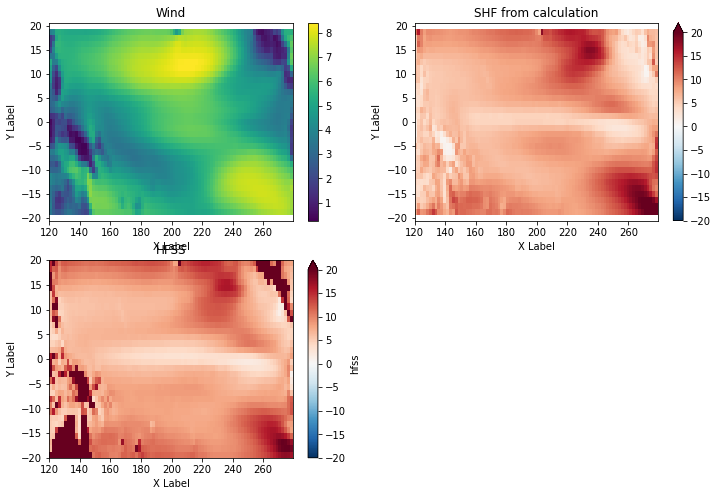

In [29]:
'''
 Cp: atm specific heat capacity 1005.5 J Kg-1 C-1
 rho: atm density 1.275 Km m-3
 CSH: 1.5 e -3

  rho*W*Cp*CSH*delta_t
  rho*W*Lv*CLH*delta_q
  
  QL=Lr*ho*CL*U*(qo-qa)
  
'''

Cp = 1005.5
rho = 1.275
CSH = 1.5e-3

# Calculate wind speed using uas_regrid and vas
wind = np.sqrt(uas_regrid**2 + vas**2)
#wind_da = xr.DataArray(wind, coords={'time': wind.time, 'lat': wind.lat, 'lon': wind.lon}, dims=('time', 'lat', 'lon'))
#mean_wind = wind_da.mean('time')


# HFSS: Qs = Cp*rho*Cs*U(To-Ta)

delta_t = ts_regrid - tas_regrid
SHF = rho*wind*Cp*CSH*delta_t

fig = plt.figure(figsize=(12, 8))

plt.subplot(221)
wind.mean('time').plot()
plt.title('Wind')
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.subplot(222)
SHF.mean('time').plot(cmap='RdBu_r', vmax=20, vmin=-20)
plt.title('SHF from calculation')
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.subplot(223)
hfss.mean('time').plot(cmap='RdBu_r', vmax=20, vmin=-20)
plt.title('HFSS')
plt.xlabel('X Label')
plt.ylabel('Y Label')

#fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(6, 6), sharex=True)

    # Assuming x_vas, y_vas, and SHF[0] are your data arrays for the first subplot
#    im1 = axs[0].contourf(x_vas, y_vas, SHF.mean('time'), cmap='RdBu', vmin=-20, vmax=20)
#    axs[0].set_title('Subplot 1 Title')
#    axs[0].set_ylabel('Y Label')

    # Assuming hfss is your data array for the second subplot
#    im2 = axs[1].contourf(x_hfss, y_hfss, hfss.mean('time'), cmap='RdBu', vmin=-20, vmax=20)
#    axs[1].set_title('Subplot 2 Title')
#    axs[1].set_xlabel('X Label')
#    axs[1].set_ylabel('Y Label')

    # Create a common colorbar for both subplots
    #cbar_ax = fig.add_axes([1.02, 0.15, 0.03, 0.7])  # Define the position of the colorbar [left, bottom, width, height]
    #cbar = fig.colorbar(im2, cax=cbar_ax, orientation='vertical')
    #cbar.set_label('Colorbar Label')

    # Adjust layout
#    plt.tight_layout()

    # Show the plots
#    plt.show()


# d) HFLS

<xarray.DataArray 'huss' ()>
array(0.02266425)
Coordinates:
    height   float64 2.0
(120, 32, 85)
(120, 33, 85)
(120, 32, 85)
(120, 33, 85)


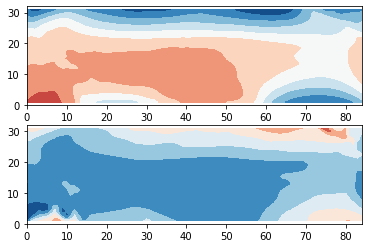

In [14]:
psl = file_list[11]['psl'].sel(lat=slice(lat1, lat2), lon=slice(lon1, lon2))
huss = file_list[6]['huss'].sel(lat=slice(lat1, lat2), lon=slice(lon1, lon2))

x_psl = psl.lon
y_psl = psl.lat

x_huss = huss.lon
y_huss = huss.lat

psl_regrid = psl.interp(lat=vas.lat, lon=vas.lon)
huss_regrid = huss.interp(lat=vas.lat, lon=vas.lon)

#psl_regrid = interpolate_3d_data(y_psl, x_psl, psl, y_vas, x_vas)
#huss_regrid = interpolate_3d_data(y_huss, x_huss, huss, y_vas, x_vas)
print(np.max(huss_regrid))

print(np.shape(psl))
print(np.shape(psl_regrid))
print(np.shape(huss))
print(np.shape(huss_regrid))

#condition = (psl_regrid > 10000)  # Define the condition
#psl_regrid[condition] /= 100       # Divide elements by 100 where the condition is True

condition = (psl_regrid > 10000)
psl_regrid_modified = xr.where(condition, psl_regrid / 100, psl_regrid)

#condition = (ts_regrid > 100) & (tas_regrid > 100)
#ts_regrid = ts_regrid.where(~condition, ts_regrid - 273.15)

plt.subplot(211)
plt.contourf(psl_regrid[0],cmap='RdBu')#, vmax=200, vmin=-200)
plt.subplot(212)
plt.contourf(huss_regrid[0],cmap='RdBu')#, vmax=200, vmin=-200)


In [32]:
'''
 Lv: latent heat vapourisation
     2.5008x10^6-2.3x10^3*Ts J/Kg
 Ts: surfacde temperture !! in 'C !!!
 rho: atm density 1.275 Km m-3
 CLH: 1.5 e -3
 p: atm pressure in hPa !!!

  rho*W*Lv*CLH*delta_q
'''

# Assuming ts_regrid and tas_regrid are your arrays
# ts_regrid = ts_regrid - 273.15
# tas_regrid = tas_regrid - 273.15
# based on top we can do this but but but only in 2D !!!
# condition = (ts_regrid > 100) & (tas_regrid > 100)
# ts_regrid[condition] -= 273.15

# Define the condition
condition = (ts_regrid > 100) & (tas_regrid > 100)

# Use the where function to modify values based on the condition
ts_regrid = ts_regrid.where(~condition, ts_regrid - 273.15)
tas_regrid = tas_regrid.where(~condition, tas_regrid - 273.15)

e_ts = 6.112*np.exp(17.67*ts_regrid/(ts_regrid+243.5))
#e_tas = 6.112*np.exp(17.67*tas_regrid/(tas_regrid+243.5))

# for HFLS:  QL=Lr*ho*CL*U*(qo-qa)
q_ts=0.622*e_ts/(psl_regrid-0.378*e_ts)
#q_tas=0.622*e_tas/(psl_regrid-0.378*e_tas)
qas = huss_regrid

#fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(6, 6), sharex=True)
vmin = -0.5
vmax = 0.5
import matplotlib as mpl
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

    # Assuming x_vas, y_vas, and LHF[0] are your data arrays for the first subplot
#    im1 = axs[0].contourf(x_vas, y_vas, q_ts[0], cmap='RdBu',vmax=.05, vmin=-.05)
#    axs[0].set_title('Subplot 1 Title')
#    axs[0].set_ylabel('Y Label')

    # Assuming hfls is your data array for the second subplot
#    im2 = axs[1].contourf(x_vas, y_vas, qas[0], cmap='RdBu',vmax=.05, vmin=-.05)
#    axs[1].set_title('Subplot 2 Title')
#    axs[1].set_xlabel('X Label')
#    axs[1].set_ylabel('Y Label')

    # Create a common colorbar for both subplots
#    cbar_ax = fig.add_axes([1.02, 0.15, 0.03, 0.7])  # Define the position of the colorbar [left, bottom, width, height]
#    cbar = fig.colorbar(im2, cax=cbar_ax, orientation='vertical')
#    cbar.set_label('Colorbar Label')

    # Adjust layout
#    plt.tight_layout()

    # Show the plots
#    plt.show()


print( np.max(q_ts).values )
print( np.max(qas).values )
      

0.0004378977211185894
0.022664250805974007


-949.3257127427263
435.49139404296875


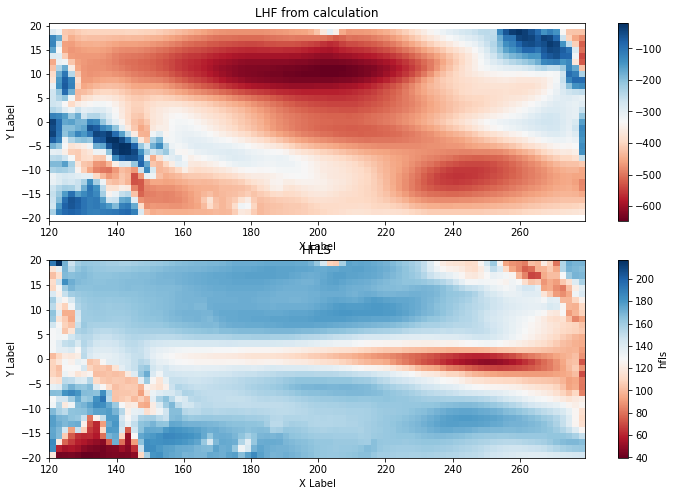

In [24]:

# qas need to be loaded!! 
# huss is the qas 

Lv = 2.5008*10**6 - 2.3*10**3*ts_regrid
delta_q = qas - q_ts
CLH = 1.5 * 10**-3
LHF = - rho*wind*Lv*CLH*delta_q

fig = plt.figure(figsize=(12, 8))

plt.subplot(211)
LHF.mean('time').plot(cmap='RdBu')#, vmin=40, vmax=220)
plt.title('LHF from calculation')
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.subplot(212)
hfls.mean('time').plot(cmap='RdBu')#, vmin=40, vmax=220)
plt.title('HFLS')
plt.xlabel('X Label')
plt.ylabel('Y Label')



    # Assuming LHF[0] and hfls[0] are your data arrays
    # Create a common Norm object with the desired vmin and vmax
#    vmin = 0
#    vmax = 420
#    import matplotlib as mpl
#    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

#    fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(6, 6), sharex=True)

    # Assuming x_vas, y_vas, and LHF[0] are your data arrays for the first subplot
#    im1 = axs[0].contourf(x_vas, y_vas, LHF[0], cmap='RdBu', norm=norm)
#    axs[0].set_title('LHF from calculation')
#    axs[0].set_ylabel('Y Label')

    # Assuming hfls is your data array for the second subplot
#    im2 = axs[1].contourf(hfls.lon, hfls.lat, hfls[0], cmap='RdBu', norm=norm)
#    axs[1].set_title('HFLS')
#    axs[1].set_xlabel('X Label')
#    axs[1].set_ylabel('Y Label')

    # Create a common colorbar for both subplots
#    cbar_ax = fig.add_axes([1.02, 0.15, 0.03, 0.7])  # Define the position of the colorbar [left, bottom, width, height]
#    cbar = fig.colorbar(im2, cax=cbar_ax, orientation='vertical')
#    cbar.set_label('Colorbar Label')

    # Adjust layout
#    plt.tight_layout()

    # Show the plots
#    plt.show()

print(np.min(LHF).values)
print(np.max(hfls).values)

# Net Heat Flux

(120, 33, 85)
(120, 33, 85)
(120, 32, 85)
(120, 32, 85)
(120, 33, 85)


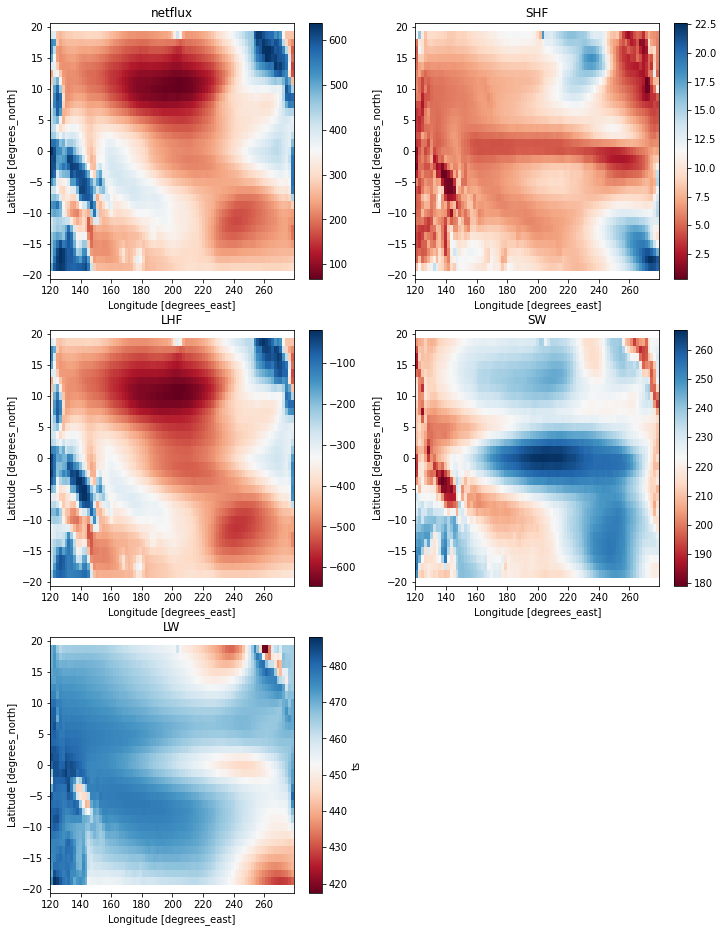

In [41]:
print(SHF.shape)
print(LHF.shape)
print(SW.shape)
print(LW.shape)

LW_regrid = LW.interp(lat=vas.lat, lon=vas.lon)
SW_regrid = SW.interp(lat=vas.lat, lon=vas.lon)

#LW_regrid = interpolate_3d_data_kp(LW.lat, LW.lon, LW, LHF.lat, LHF.lon)
#SW_regrid = interpolate_3d_data_kp(SW.lat, SW.lon, SW, SHF.lat, SHF.lon)

netflux = SHF + LHF + SW_regrid + LW_regrid

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(12, 16), sharex=True)
plt.subplot(321)
netflux.mean('time').plot(cmap='RdBu');plt.title('netflux')
plt.subplot(322)
SHF.mean('time').plot(cmap='RdBu');plt.title('SHF')
plt.subplot(323)
LHF.mean('time').plot(cmap='RdBu');plt.title('LHF')
plt.subplot(324)
SW_regrid.mean('time').plot(cmap='RdBu');plt.title('SW')
plt.subplot(325)
LW_regrid.mean('time').plot(cmap='RdBu');plt.title('LW')

print(netflux.shape)

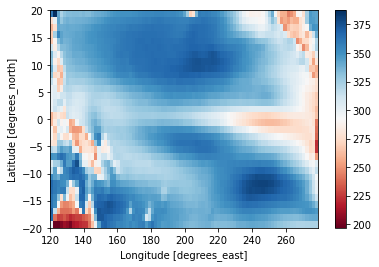

In [62]:
'''
filenames = [idir+'ts_Amon_ACCESS-CM2_historical_r5i1p1f1_gn_200001-200912.nc',   0
            idir+'tas_Amon_ACCESS-CM2_historical_r5i1p1f1_gn_200001-200912.nc',   1
            idir+'uas_Amon_ACCESS-CM2_historical_r5i1p1f1_gn_200001-200912.nc',   2
            idir+'vas_Amon_ACCESS-CM2_historical_r5i1p1f1_gn_200001-200912.nc',   3
            idir+'hfls_Amon_ACCESS-CM2_historical_r5i1p1f1_gn_200001-200912.nc',  4
            idir+'hfss_Amon_ACCESS-CM2_historical_r5i1p1f1_gn_200001-200912.nc',  5
            idir+'huss_Amon_ACCESS-CM2_historical_r5i1p1f1_gn_200001-200912.nc',  6
            idir+'rlds_Amon_ACCESS-CM2_historical_r5i1p1f1_gn_200001-200912.nc',  7
            idir+'rlus_Amon_ACCESS-CM2_historical_r5i1p1f1_gn_200001-200912.nc',  8
            idir+'rsds_Amon_ACCESS-CM2_historical_r5i1p1f1_gn_200001-200912.nc',  9
            idir+'rsus_Amon_ACCESS-CM2_historical_r5i1p1f1_gn_200001-200912.nc', 10
            idir+'psl_Amon_ACCESS-CM2_historical_r5i1p1f1_gn_200001-200912.nc'] 11

# Sample data (replace with your data)
ts = ...  # 2D array of surface temperature [time, lat, lon] in K
hfss = ...  # 2D array of surface sensible heat flux [time, lat, lon] in W/m^2
hfls = ...  # 2D array of surface latent heat flux [time, lat, lon] in W/m^2
rsdt = ...  # 2D array of top-of-atmosphere incoming shortwave radiation [time, lat, lon] in W/m^2
rsut = ...  # 2D array of top-of-atmosphere outgoing shortwave radiation [time, lat, lon] in W/m^2
rlut = ...  # 2D array of top-of-atmosphere outgoing longwave radiation [time, lat, lon] in W/m^2

# Calculate net radiative flux
net_radiative_flux = (rsdt - rsut) - rlut

# Calculate net downward surface heat flux
net_surface_heat_flux = hfss + hfls + net_radiative_flux

# If you have other components like ground heat flux, you can add them as well
ground_heat_flux = ...  # 2D array of ground heat flux [time, lat, lon] in W/m^2
net_surface_heat_flux += ground_heat_flux

'''

# Calculate net surface heat flux
net_surface_heat_flux = hfss + hfls + (rlds - rlus) + (rsds - rsus) - rlut
net_surface_heat_flux.mean('time').plot(cmap='RdBu')

# Create a zonal advection Dataset containing the DataArrays
data_dict = {
    'net_surface_heat_flux' : net_surface_heat_flux,
}
ds = xr.Dataset(data_dict)

# Save the Dataset to a netCDF file
ds.to_netcdf('net_surface_heat_flux.nc')

# Calculate horizontal advection grid info

## 3) Grid info

In [48]:
idir = '/g/data/p66/ars599/work_eae/'
filenames = [idir+'uo_Omon_ACCESS-CM2_historical_r5i1p1f1_gn_200001-200912_v10.nc',
            idir+'vo_Omon_ACCESS-CM2_historical_r5i1p1f1_gn_200001-200912_v10.nc',
            idir+'wo_Omon_ACCESS-CM2_historical_r5i1p1f1_gn_200001-200912_v10.nc',
            idir+'thetao_Omon_ACCESS-CM2_historical_r5i1p1f1_gn_200001-200912_v10.nc']

file_list = []

for filename in filenames:
    ds = xr.open_dataset(filename)
    file_list.append(ds)

ds = file_list[0]
ds

<xarray.Dataset>
Dimensions:         (time: 120, bnds: 2, j: 99, i: 161, vertices: 4, lev: 11)
Coordinates:
  * time            (time) datetime64[ns] 2000-01-16T12:00:00 ... 2009-12-16T...
    longitude       (j, i) float64 ...
    latitude        (j, i) float64 ...
  * i               (i) float64 39.0 40.0 41.0 42.0 ... 196.0 197.0 198.0 199.0
  * j               (j) float64 87.0 88.0 89.0 90.0 ... 182.0 183.0 184.0 185.0
  * lev             (lev) float64 5.0 15.0 25.0 35.0 ... 75.0 85.0 95.0 105.0
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds       (time, bnds) datetime64[ns] ...
    longitude_bnds  (j, i, vertices) float64 ...
    latitude_bnds   (j, i, vertices) float64 ...
    lev_bnds        (lev, bnds) float64 ...
    uo              (time, lev, j, i) float32 ...
Attributes: (12/48)
    CDI:                    Climate Data Interface version 2.0.5 (https://mpi...
    source:                 ACCESS-CM2 (2019): \naerosol: UKCA-GLOMAP-mode\na...
    institution:            CSIRO (Commonwealth Scientific and Industrial Res...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    ...                     ...
    variant_label:          r5i1p1f1
    version:                v20210607
    license:                CMIP6 model data produced by CSIRO is licensed un...
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/7e3c3fb7-de8c-4efa-b274-9712d36b1cb7
    CDO:                    Climate Data Operators version 2.0.5 (https://mpi...

<xarray.DataArray 'uo' (time: 120, lev: 11, j: 99, i: 161)>
[21039480 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2000-01-16T12:00:00 ... 2009-12-16T12:00:00
    longitude  (j, i) float64 120.0 121.0 122.0 123.0 ... 278.0 279.0 280.0
    latitude   (j, i) float64 -19.76 -19.76 -19.76 -19.76 ... 19.76 19.76 19.76
  * i          (i) float64 39.0 40.0 41.0 42.0 43.0 ... 196.0 197.0 198.0 199.0
  * j          (j) float64 87.0 88.0 89.0 90.0 91.0 ... 182.0 183.0 184.0 185.0
  * lev        (lev) float64 5.0 15.0 25.0 35.0 45.0 ... 75.0 85.0 95.0 105.0
Attributes:
    standard_name:  sea_water_x_velocity
    long_name:      Sea Water X Velocity
    units:          m s-1
    comment:        Prognostic x-ward velocity component resolved by the model.
    cell_methods:   time: mean
    history:        2021-06-07T11:08:30Z altered by CMOR: replaced missing va...


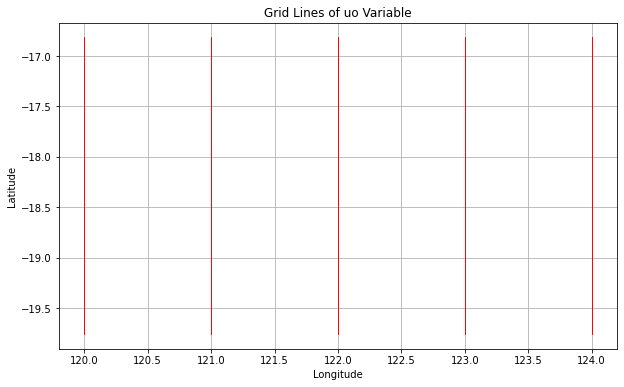

In [49]:
# Assuming your dataset is named ds
ds = file_list[0]

# Assuming uo is the uo variable from your xarray.Dataset (ds)
uo = ds.uo
print(uo)
# Get latitude and longitude grid information
latitude = ds['latitude'].values[0:5,0:5]
longitude = ds['longitude'].values[0:5,0:5]

# Create a plot
plt.figure(figsize=(10, 6))

# Plot longitude grid lines
for lat in latitude:
    plt.plot(longitude, [lat] * len(longitude), color='blue', linewidth=0.5)

# Plot latitude grid lines
for lon in longitude:
    plt.plot([lon] * len(latitude), latitude, color='red', linewidth=0.5)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Grid Lines of uo Variable')
plt.grid(True)
plt.show()


<xarray.DataArray 'vo' (time: 120, lev: 11, j: 99, i: 161)>
[21039480 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2000-01-16T12:00:00 ... 2009-12-16T12:00:00
    longitude  (j, i) float64 ...
    latitude   (j, i) float64 ...
  * i          (i) float64 39.0 40.0 41.0 42.0 43.0 ... 196.0 197.0 198.0 199.0
  * j          (j) float64 87.0 88.0 89.0 90.0 91.0 ... 182.0 183.0 184.0 185.0
  * lev        (lev) float64 5.0 15.0 25.0 35.0 45.0 ... 75.0 85.0 95.0 105.0
Attributes:
    standard_name:  sea_water_y_velocity
    long_name:      Sea Water Y Velocity
    units:          m s-1
    comment:        Prognostic y-ward velocity component resolved by the model.
    cell_methods:   time: mean
    history:        2021-06-07T12:22:15Z altered by CMOR: replaced missing va...


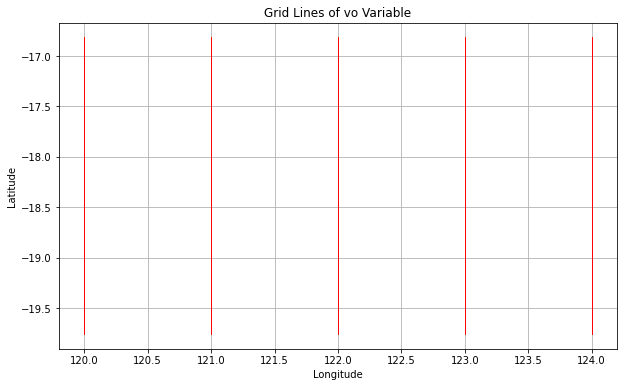

In [50]:
# Assuming your dataset is named ds
ds = file_list[1]

# Assuming vo is the vo variable from your xarray.Dataset (ds)
vo = ds.vo
print(vo)
# Get latitude and longitude grid information
latitude = ds['latitude'].values[0:5,0:5]
longitude = ds['longitude'].values[0:5,0:5]

# Create a plot
plt.figure(figsize=(10, 6))

# Plot longitude grid lines
for lat in latitude:
    plt.plot(longitude, [lat] * len(longitude), color='blue', linewidth=0.5)

# Plot latitude grid lines
for lon in longitude:
    plt.plot([lon] * len(latitude), latitude, color='red', linewidth=0.5)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Grid Lines of vo Variable')
plt.grid(True)
plt.show()


<xarray.DataArray 'thetao' (time: 120, lev: 11, j: 98, i: 160)>
[20697600 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2000-01-16T12:00:00 ... 2009-12-16T12:00:00
    longitude  (j, i) float64 ...
    latitude   (j, i) float64 ...
  * i          (i) float64 40.0 41.0 42.0 43.0 44.0 ... 196.0 197.0 198.0 199.0
  * j          (j) float64 88.0 89.0 90.0 91.0 92.0 ... 182.0 183.0 184.0 185.0
  * lev        (lev) float64 5.0 15.0 25.0 35.0 45.0 ... 75.0 85.0 95.0 105.0
Attributes:
    standard_name:  sea_water_potential_temperature
    long_name:      Sea Water Potential Temperature
    units:          degC
    comment:        Diagnostic should be contributed even for models using co...
    cell_methods:   area: mean where sea time: mean
    cell_measures:  area: areacello volume: volcello
    history:        2021-06-07T09:35:17Z altered by CMOR: replaced missing va...


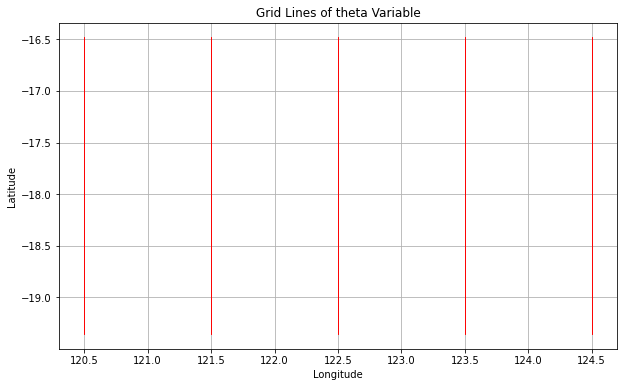

In [51]:
# Assuming your dataset is named ds
ds = file_list[3]

# Assuming uo is the uo variable from your xarray.Dataset (ds)
theta = ds.thetao
print(theta)
# Get latitude and longitude grid information
latitude = ds['latitude'].values[0:5,0:5]
longitude = ds['longitude'].values[0:5,0:5]

# Create a plot
plt.figure(figsize=(10, 6))

# Plot longitude grid lines
for lat in latitude:
    plt.plot(longitude, [lat] * len(longitude), color='blue', linewidth=0.5)

# Plot latitude grid lines
for lon in longitude:
    plt.plot([lon] * len(latitude), latitude, color='red', linewidth=0.5)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Grid Lines of theta Variable')
plt.grid(True)
plt.show()
